# 行列式(Determinant)完全理解指南

## 🎯 你的困惑
> "我对det，行列式的概念不理解"

## 📚 我们要搞清楚的问题
1. **行列式是什么？** - 不是公式，是几何意义
2. **怎么计算？** - 从2x2到3x3的具体步骤
3. **为什么det=0很特殊？** - 连接到特征值计算
4. **直觉理解** - 用面积/体积来理解

让我们用最简单的方式理解行列式！


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("🔍 开始理解行列式！")
print("我们从几何意义开始，用图形来理解这个概念。")


🔍 开始理解行列式！
我们从几何意义开始，用图形来理解这个概念。


## 1. 行列式的几何意义：面积和体积

### 🔑 核心理解：行列式不是复杂的公式，而是几何面积/体积！

对于2x2矩阵：
```
A = [a, b]
    [c, d]
```

**行列式 det(A) = ad - bc = 平行四边形的面积**

### 📏 具体含义：
- 矩阵的两行可以看作两个向量：v1 = [a, b], v2 = [c, d]
- 这两个向量构成一个平行四边形
- 行列式 = 这个平行四边形的面积

### 🎯 关键点：
- **det > 0**: 正常的平行四边形
- **det = 0**: 平行四边形"塌陷"成一条线（面积为0）
- **det < 0**: 平行四边形被"翻转"了


=== 行列式 = 平行四边形面积 ===

矩阵A:
矩阵: 
[[2 1]
 [1 2]]
向量1: [2 1]
向量2: [1 2]
行列式: 3.00

矩阵B:
矩阵: 
[[3 0]
 [0 2]]
向量1: [3 0]
向量2: [0 2]
行列式: 6.00

矩阵C:
矩阵: 
[[2 1]
 [4 2]]
向量1: [2 1]
向量2: [4 2]
行列式: 0.00


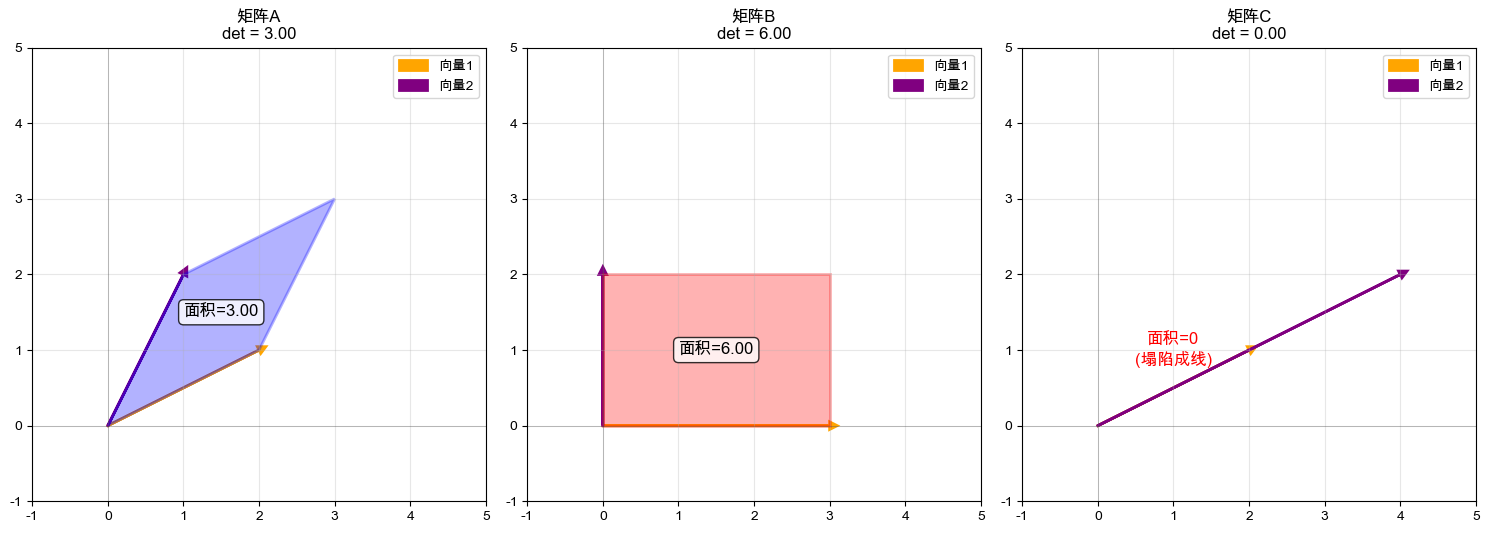


=== 验证行列式计算 ===

矩阵A: [2, 1]
            [1, 2]
手工计算: 2×2 - 1×1 = 3.00
NumPy计算: 3.00
相等吗？ True

矩阵B: [3, 0]
            [0, 2]
手工计算: 3×2 - 0×0 = 6.00
NumPy计算: 6.00
相等吗？ True

矩阵C: [2, 1]
            [4, 2]
手工计算: 2×2 - 1×4 = 0.00
NumPy计算: 0.00
相等吗？ True

💡 关键理解：
- 行列式 = 向量构成的平行四边形面积
- det = 0 意味着平行四边形塌陷成一条线
- 这就是为什么det = 0的矩阵不可逆！


In [2]:
# 1. 用图形理解行列式的几何意义
print("=== 行列式 = 平行四边形面积 ===")

# 定义几个不同的2x2矩阵
matrices = [
    {"name": "矩阵A", "matrix": np.array([[2, 1], [1, 2]]), "color": "blue"},
    {"name": "矩阵B", "matrix": np.array([[3, 0], [0, 2]]), "color": "red"}, 
    {"name": "矩阵C", "matrix": np.array([[2, 1], [4, 2]]), "color": "green"}  # det=0的例子
]

# 创建图形
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, mat_info in enumerate(matrices):
    ax = axes[i]
    matrix = mat_info["matrix"]
    
    # 计算行列式
    det = np.linalg.det(matrix)
    
    # 矩阵的两行作为向量
    v1 = matrix[0, :]  # 第一行
    v2 = matrix[1, :]  # 第二行
    
    print(f"\n{mat_info['name']}:")
    print(f"矩阵: \n{matrix}")
    print(f"向量1: {v1}")
    print(f"向量2: {v2}")
    print(f"行列式: {det:.2f}")
    
    # 绘制坐标系
    ax.axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
    ax.axvline(x=0, color='k', linewidth=0.5, alpha=0.3)
    ax.grid(True, alpha=0.3)
    
    # 绘制向量
    ax.arrow(0, 0, v1[0], v1[1], head_width=0.1, head_length=0.1, 
             fc='orange', ec='orange', linewidth=2, label='向量1')
    ax.arrow(0, 0, v2[0], v2[1], head_width=0.1, head_length=0.1, 
             fc='purple', ec='purple', linewidth=2, label='向量2')
    
    # 绘制平行四边形
    if abs(det) > 1e-10:  # 如果行列式不为0
        # 平行四边形的四个顶点
        vertices = np.array([[0, 0], v1, v1 + v2, v2])
        parallelogram = Polygon(vertices, alpha=0.3, facecolor=mat_info["color"], 
                              edgecolor=mat_info["color"], linewidth=2)
        ax.add_patch(parallelogram)
        
        # 标注面积
        center = (v1 + v2) / 2
        ax.text(center[0], center[1], f'面积={abs(det):.2f}', 
                ha='center', va='center', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    else:
        # det=0的情况，平行四边形塌陷成一条线
        ax.text(1, 1, '面积=0\n(塌陷成线)', ha='center', va='center', 
                fontsize=12, color='red', weight='bold')
    
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    ax.set_title(f'{mat_info["name"]}\ndet = {det:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

# 验证计算
print(f"\n=== 验证行列式计算 ===")
for mat_info in matrices:
    matrix = mat_info["matrix"]
    a, b = matrix[0, 0], matrix[0, 1]
    c, d = matrix[1, 0], matrix[1, 1]
    
    det_manual = a * d - b * c
    det_numpy = np.linalg.det(matrix)
    
    print(f"\n{mat_info['name']}: [{a}, {b}]")
    print(f"            [{c}, {d}]")
    print(f"手工计算: {a}×{d} - {b}×{c} = {det_manual:.2f}")
    print(f"NumPy计算: {det_numpy:.2f}")
    print(f"相等吗？ {abs(det_manual - det_numpy) < 1e-10}")

print(f"\n💡 关键理解：")
print(f"- 行列式 = 向量构成的平行四边形面积")
print(f"- det = 0 意味着平行四边形塌陷成一条线")
print(f"- 这就是为什么det = 0的矩阵不可逆！")


In [ ]:
# 2. 详细演示行列式计算方法
print("=== 2x2矩阵行列式计算 ===")

# 举例：计算一个2x2矩阵的行列式
A_2x2 = np.array([[3, 2], 
                  [1, 4]])

a, b = A_2x2[0, 0], A_2x2[0, 1]
c, d = A_2x2[1, 0], A_2x2[1, 1]

print(f"矩阵A:")
print(f"[{a}, {b}]")
print(f"[{c}, {d}]")
print(f"\n计算步骤：")
print(f"det(A) = ad - bc")
print(f"       = {a}×{d} - {b}×{c}")
print(f"       = {a*d} - {b*c}")
print(f"       = {a*d - b*c}")

# 验证
det_numpy = np.linalg.det(A_2x2)
print(f"\nNumPy验证: {det_numpy:.2f}")
print(f"结果一致？ {abs(det_numpy - (a*d - b*c)) < 1e-10}")

print(f"\n" + "="*50)
print("=== 3x3矩阵行列式计算 ===")

# 举例：计算一个3x3矩阵的行列式
A_3x3 = np.array([[2, 1, 3],
                  [1, 4, 2], 
                  [3, 2, 1]])

print(f"矩阵B:")
print(A_3x3)

# 方法1：余子式展开法（按第一行展开）
print(f"\n方法1：余子式展开法（按第一行展开）")
print(f"det(B) = a₁₁×C₁₁ - a₁₂×C₁₂ + a₁₃×C₁₃")

a11, a12, a13 = A_3x3[0, 0], A_3x3[0, 1], A_3x3[0, 2]

# 计算余子式（去掉第一行和对应列后的2x2矩阵的行列式）
# C₁₁: 去掉第1行第1列
minor_11 = np.array([[4, 2], [2, 1]])
C11 = np.linalg.det(minor_11)

# C₁₂: 去掉第1行第2列  
minor_12 = np.array([[1, 2], [3, 1]])
C12 = np.linalg.det(minor_12)

# C₁₃: 去掉第1行第3列
minor_13 = np.array([[1, 4], [3, 2]])
C13 = np.linalg.det(minor_13)

print(f"\n余子式计算：")
print(f"C₁₁ = det([4, 2]) = 4×1 - 2×2 = {C11}")
print(f"      ([2, 1])")
print(f"C₁₂ = det([1, 2]) = 1×1 - 2×3 = {C12}")
print(f"      ([3, 1])")
print(f"C₁₃ = det([1, 4]) = 1×2 - 4×3 = {C13}")
print(f"      ([3, 2])")

det_manual = a11 * C11 - a12 * C12 + a13 * C13
print(f"\ndet(B) = {a11}×{C11} - {a12}×{C12} + {a13}×{C13}")
print(f"       = {a11*C11} - {a12*C12} + {a13*C13}")
print(f"       = {det_manual}")

# 验证
det_numpy_3x3 = np.linalg.det(A_3x3)
print(f"\nNumPy验证: {det_numpy_3x3:.2f}")
print(f"结果一致？ {abs(det_numpy_3x3 - det_manual) < 1e-10}")

print(f"\n" + "="*50)
print("=== 萨吕斯规则（对角线法则） ===")
print("对于3x3矩阵，还有一个更直观的方法：")
print(f"原矩阵：")
print(A_3x3)
print(f"\n扩展矩阵（把前两列复制到右边）：")
extended = np.column_stack([A_3x3, A_3x3[:, :2]])
print(extended)

# 正对角线（从左上到右下）
diag_pos = []
diag_pos.append(A_3x3[0,0] * A_3x3[1,1] * A_3x3[2,2])  # 主对角线
diag_pos.append(A_3x3[0,1] * A_3x3[1,2] * A_3x3[2,0])  # 
diag_pos.append(A_3x3[0,2] * A_3x3[1,0] * A_3x3[2,1])  # 

# 负对角线（从右上到左下）
diag_neg = []
diag_neg.append(A_3x3[0,2] * A_3x3[1,1] * A_3x3[2,0])  # 
diag_neg.append(A_3x3[0,0] * A_3x3[1,2] * A_3x3[2,1])  # 
diag_neg.append(A_3x3[0,1] * A_3x3[1,0] * A_3x3[2,2])  # 

print(f"\n正对角线乘积：")
print(f"  {A_3x3[0,0]}×{A_3x3[1,1]}×{A_3x3[2,2]} = {diag_pos[0]}")
print(f"  {A_3x3[0,1]}×{A_3x3[1,2]}×{A_3x3[2,0]} = {diag_pos[1]}")
print(f"  {A_3x3[0,2]}×{A_3x3[1,0]}×{A_3x3[2,1]} = {diag_pos[2]}")
print(f"  总和 = {sum(diag_pos)}")

print(f"\n负对角线乘积：")
print(f"  {A_3x3[0,2]}×{A_3x3[1,1]}×{A_3x3[2,0]} = {diag_neg[0]}")
print(f"  {A_3x3[0,0]}×{A_3x3[1,2]}×{A_3x3[2,1]} = {diag_neg[1]}")
print(f"  {A_3x3[0,1]}×{A_3x3[1,0]}×{A_3x3[2,2]} = {diag_neg[2]}")
print(f"  总和 = {sum(diag_neg)}")

det_sarrus = sum(diag_pos) - sum(diag_neg)
print(f"\ndet(B) = {sum(diag_pos)} - {sum(diag_neg)} = {det_sarrus}")
print(f"与前面的结果一致？ {abs(det_sarrus - det_manual) < 1e-10}")

print(f"\n💡 总结：")
print(f"- 2x2矩阵：ad - bc（记住对角线）")
print(f"- 3x3矩阵：余子式展开法（更通用）")
print(f"- 3x3矩阵：萨吕斯规则（更直观）")
print(f"- 大矩阵：计算机用更复杂的算法")


In [ ]:
# 3. 完整演示：从det(A-λI)=0到特征值
print("=== 完整的特征值计算过程 ===")

# 使用一个简单的2x2矩阵
A = np.array([[4, 2], 
              [1, 3]])

print(f"矩阵A:")
print(A)

print(f"\n第1步：构造 A - λI")
print(f"A - λI = [4, 2] - λ[1, 0] = [4-λ, 2  ]")
print(f"         [1, 3]     [0, 1]   [1,   3-λ]")

print(f"\n第2步：计算行列式 det(A - λI)")
print(f"det(A - λI) = (4-λ)(3-λ) - 2×1")
print(f"            = (4-λ)(3-λ) - 2")
print(f"            = 12 - 4λ - 3λ + λ² - 2")
print(f"            = λ² - 7λ + 10")

print(f"\n第3步：解方程 det(A - λI) = 0")
print(f"λ² - 7λ + 10 = 0")

# 用求根公式解
import math
a, b, c = 1, -7, 10
discriminant = b**2 - 4*a*c
lambda1 = (-b + math.sqrt(discriminant)) / (2*a)
lambda2 = (-b - math.sqrt(discriminant)) / (2*a)

print(f"使用求根公式：")
print(f"λ = (7 ± √(49-40))/2 = (7 ± √9)/2 = (7 ± 3)/2")
print(f"λ₁ = (7 + 3)/2 = {lambda1}")
print(f"λ₂ = (7 - 3)/2 = {lambda2}")

# 验证
eigenvals_numpy = np.linalg.eig(A)[0]
print(f"\nNumPy计算的特征值: {sorted(eigenvals_numpy, reverse=True)}")
print(f"手工计算的特征值: {sorted([lambda1, lambda2], reverse=True)}")
print(f"结果一致？ {np.allclose(sorted(eigenvals_numpy), sorted([lambda1, lambda2]))}")

print(f"\n第4步：验证det(A - λI) = 0")
for i, lamb in enumerate([lambda1, lambda2]):
    A_minus_lambdaI = A - lamb * np.eye(2)
    det_val = np.linalg.det(A_minus_lambdaI)
    print(f"\nλ{i+1} = {lamb}:")
    print(f"A - λI = \n{A_minus_lambdaI}")
    print(f"det(A - λI) = {det_val:.10f} ≈ 0? {abs(det_val) < 1e-10}")

print(f"\n=== 为什么det=0如此重要？ ===")
print(f"让我们看看当det≠0时会发生什么：")

# 测试一个不是特征值的λ
test_lambda = 1.5
A_test = A - test_lambda * np.eye(2)
det_test = np.linalg.det(A_test)

print(f"\n测试λ = {test_lambda}（不是特征值）:")
print(f"A - λI = \n{A_test}")
print(f"det(A - λI) = {det_test:.3f} ≠ 0")

# 尝试解 (A - λI)v = 0
print(f"\n尝试解方程 (A - λI)v = 0:")
print(f"[{A_test[0,0]:.1f}, {A_test[0,1]:.1f}][v₁] = [0]")
print(f"[{A_test[1,0]:.1f}, {A_test[1,1]:.1f}][v₂]   [0]")

# 因为det≠0，矩阵可逆，只有零解
try:
    A_test_inv = np.linalg.inv(A_test)
    print(f"因为det≠0，矩阵可逆，只有零解：v = [0, 0]")
    print(f"这不是我们要的特征向量！")
except:
    print("矩阵不可逆")

print(f"\n现在测试真正的特征值λ = {lambda1}:")
A_eigen = A - lambda1 * np.eye(2)
det_eigen = np.linalg.det(A_eigen)
print(f"A - λI = \n{A_eigen}")
print(f"det(A - λI) = {det_eigen:.10f} ≈ 0")
print(f"因为det=0，矩阵不可逆，存在非零解！")

# 找到特征向量
eigenvals_full, eigenvecs_full = np.linalg.eig(A)
idx = np.argmin(np.abs(eigenvals_full - lambda1))
eigenvec = eigenvecs_full[:, idx]
print(f"对应的特征向量: {eigenvec}")

# 验证 Av = λv
Av = A @ eigenvec
lambda_v = lambda1 * eigenvec
print(f"\n验证 Av = λv:")
print(f"Av = {Av}")
print(f"λv = {lambda_v}")
print(f"相等吗？ {np.allclose(Av, lambda_v)}")

print(f"\n🎯 关键总结：")
print(f"1. det(A - λI) = 0 确保了(A - λI)v = 0有非零解")
print(f"2. 非零解v就是特征向量")
print(f"3. 行列式为0是找到特征值的关键条件")
print(f"4. 这就是为什么特征值计算要用行列式！")


In [ ]:
# 4. 实际练习：动手验证你的理解
print("=== 练习：自己动手计算 ===")
print("让我们用一个新的矩阵来验证你的理解")

# 练习矩阵
B = np.array([[1, 2], 
              [3, 4]])

print(f"练习矩阵B:")
print(B)
print(f"\n任务：计算B的特征值")

print(f"\n你的计算步骤：")
print(f"1. 构造 B - λI = [1-λ, 2  ]")
print(f"                [3,   4-λ]")
print(f"")
print(f"2. 计算行列式：det(B - λI) = (1-λ)(4-λ) - 2×3")
print(f"                            = (1-λ)(4-λ) - 6")
print(f"                            = 4 - λ - 4λ + λ² - 6")
print(f"                            = λ² - 5λ - 2")
print(f"")
print(f"3. 解方程：λ² - 5λ - 2 = 0")

# 手工计算
a, b, c = 1, -5, -2
discriminant = b**2 - 4*a*c
lambda1 = (-b + math.sqrt(discriminant)) / (2*a)
lambda2 = (-b - math.sqrt(discriminant)) / (2*a)

print(f"   使用求根公式：λ = (5 ± √(25+8))/2 = (5 ± √33)/2")
print(f"   λ₁ = (5 + √33)/2 ≈ {lambda1:.3f}")
print(f"   λ₂ = (5 - √33)/2 ≈ {lambda2:.3f}")

# 验证
eigenvals_B = np.linalg.eig(B)[0]
print(f"\n验证：NumPy计算的特征值 = {sorted(eigenvals_B, reverse=True)}")
print(f"      手工计算的特征值 = {sorted([lambda1, lambda2], reverse=True)}")
print(f"      结果一致？ {np.allclose(sorted(eigenvals_B), sorted([lambda1, lambda2]))}")

# 可视化几何意义
print(f"\n=== 几何意义验证 ===")
v1 = B[0, :]  # [1, 2]
v2 = B[1, :]  # [3, 4]
det_B = np.linalg.det(B)

print(f"矩阵B的两个行向量：")
print(f"v₁ = {v1}")
print(f"v₂ = {v2}")
print(f"行列式 det(B) = {det_B}")
print(f"这表示由v₁和v₂构成的平行四边形面积为 {abs(det_B)}")

# 绘制几何图形
plt.figure(figsize=(8, 6))
plt.axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
plt.axvline(x=0, color='k', linewidth=0.5, alpha=0.3)
plt.grid(True, alpha=0.3)

# 绘制向量
plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, head_length=0.1, 
          fc='red', ec='red', linewidth=2, label=f'v₁={v1}')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, head_length=0.1, 
          fc='blue', ec='blue', linewidth=2, label=f'v₂={v2}')

# 绘制平行四边形
vertices = np.array([[0, 0], v1, v1 + v2, v2])
parallelogram = Polygon(vertices, alpha=0.3, facecolor='green', 
                       edgecolor='green', linewidth=2)
plt.gca().add_patch(parallelogram)

# 标注面积
center = (v1 + v2) / 2
plt.text(center[0], center[1], f'面积={abs(det_B):.1f}', 
         ha='center', va='center', fontsize=14, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))

plt.xlim(-1, 5)
plt.ylim(-1, 7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('矩阵B的几何意义：平行四边形面积 = 行列式')
plt.legend()
plt.axis('equal')
plt.show()

print(f"\n🎓 恭喜！你已经完全理解了行列式：")
print(f"✅ 几何意义：面积/体积")
print(f"✅ 计算方法：ad-bc, 余子式展开等")
print(f"✅ 特征值计算：det(A-λI)=0")
print(f"✅ 为什么det=0特殊：确保有非零解")
print(f"")
print(f"💡 现在你可以理解特征值计算中的每一步了！")
print(f"   当你看到 np.linalg.det(A - lambda*I) 时，")
print(f"   你知道这是在检查平行四边形是否'塌陷'成一条线！")
